In [26]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [27]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    parameters = {
        "W1": np.random.randn(hidden_size, input_size) * 0.01,
        "b1": np.zeros((hidden_size, 1)),
        "W2": np.random.randn(output_size, hidden_size) * 0.01,
        "b2": np.zeros((output_size, 1))
    }
    return parameters

In [28]:
def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

In [29]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = (-1/m) * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    return cost

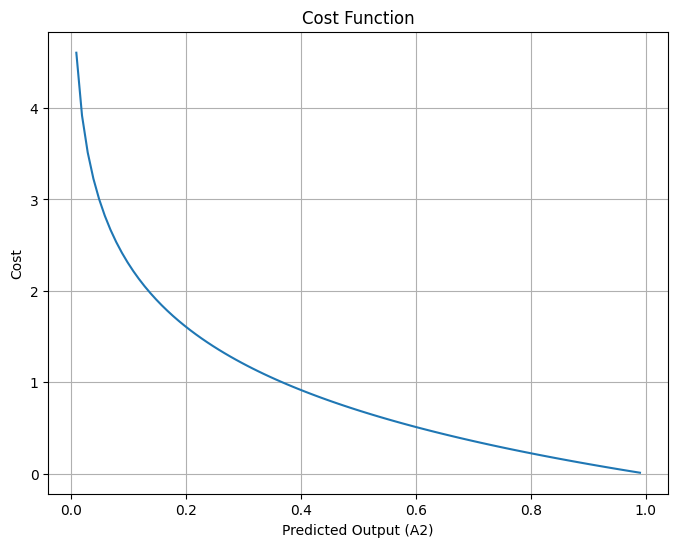

In [35]:
# Example data for input X, parameters, and true labels Y
X = np.array([[0.1, 0.2, 0.3]])
parameters = {'W1': np.array([[0.1, 0.2, 0.3], [0.2, 0.3, 0.4]]),
              'b1': np.array([[0.1], [0.2]]),
              'W2': np.array([[0.4, 0.5]]),
              'b2': np.array([[0.1]])}
Y = np.array([[1]])

# Perform forward propagation
A2, _ = forward_propagation(X.T, parameters)

# Compute the cost for different values of A2
A2_values = np.linspace(0.01, 0.99, 100)
cost_values = [compute_cost(np.array([[a]]), Y) for a in A2_values]

# Plot the cost function graph
plt.figure(figsize=(8, 6))
plt.plot(A2_values, cost_values)
plt.xlabel('Predicted Output (A2)')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.grid(True)
plt.show()

In [30]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1, W2 = parameters['W1'], parameters['W2']
    A1, A2 = cache['A1'], cache['A2']
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

In [31]:
def update_parameters(parameters, grads, learning_rate=0.01):
    for param_name in parameters:
        parameters[param_name] -= learning_rate * grads[f"d{param_name}"]
    return parameters

In [32]:
def model(X, Y, input_size, hidden_size, output_size, num_iterations=10000, learning_rate=0.01):
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    for i in range(num_iterations):
        # Forward propagation
        A2, cache = forward_propagation(X, parameters)
        # Compute cost
        cost = compute_cost(A2, Y)
        # Backward propagation
        grads = backward_propagation(parameters, cache, X, Y)
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        # Print the cost every 1000 iterations
        if i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")
    return parameters

In [33]:
input_size = 2
hidden_size = 4
output_size = 1
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # Input
Y = np.array([[0, 1, 1, 0]])  # Output
trained_parameters = model(X, Y, input_size, hidden_size, output_size, num_iterations=10000, learning_rate=0.01)


Cost after iteration 0: 0.6931471809493094
Cost after iteration 1000: 0.6931471809393078
Cost after iteration 2000: 0.6931471809347426
Cost after iteration 3000: 0.6931471809302177
Cost after iteration 4000: 0.6931471809256967
Cost after iteration 5000: 0.6931471809211798
Cost after iteration 6000: 0.6931471809166665
Cost after iteration 7000: 0.6931471809121569
Cost after iteration 8000: 0.6931471809076513
Cost after iteration 9000: 0.6931471809031492
